## Representing Qubit States

---

### Classical System:
Car's position when measured along 1 axis can be denoted as x = 4

<img src="./resources/i02_classical_car.png" width="40%"/>

Or, it can be described with the statevector |x> with probability amplitudes as the vector's elements

<img src="./resources/i03_car_statevector.png" width="40%"/>

<br>

### Quantum System:
A qubit can be in superposition (linear combination) of its basis states (using computational basis states |0> and |1>)

<img src="./resources/i04_qubit_statevector.png" width="20%"/>

<br>

In [1]:
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi

print("Process Complete!")

Process Complete!


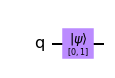

In [2]:
qc = QuantumCircuit(1)

initial_state = [0, 1]  # |1>
qc.initialize(initial_state, 0)
qc.draw(output='mpl')

In [3]:
sim = Aer.get_backend('aer_simulator')

qc = QuantumCircuit(1)
initial_state = [0, 1]
qc.initialize(initial_state, 0)
qc.save_statevector()


qc = transpile(qc, sim)

result = sim.run(qc).result()

out_state = result.get_statevector()
print(out_state)

print("\nProcess Complete!")

[0.+0.j 1.+0.j]

Process Complete!


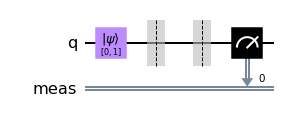

In [4]:
qc.measure_all()
qc.draw(output='mpl')

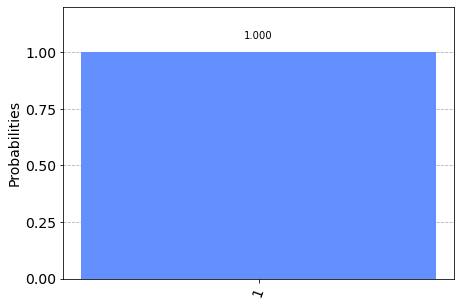

In [5]:
counts = result.get_counts()
plot_histogram(counts)  # Get 100% chance of measuring 1 since the qubit was |1>

In [6]:
# Trying the same for |q0>
initial_state = [1 / sqrt(2), 1j / sqrt(2)]

qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
qc.save_statevector()

qc = transpile(qc, sim)
result = sim.run(qc).result()

out_state = result.get_statevector()
print(out_state)

print("\nProcess Complete!")

[0.70710678+0.j         0.        +0.70710678j]

Process Complete!


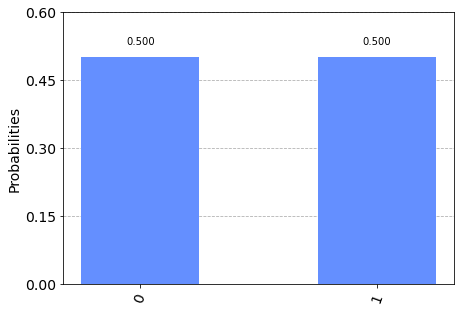

In [7]:
counts = result.get_counts()
plot_histogram(counts)  # 50% chance of getting 0, and 50% chance of getting 1

---
### The Rules of Measurement

By the Born Rule, the probability of getting $x$ after measuring a qubit in state $|\psi>$ is given by,

$$p(x) = |<x|\psi>|^2$$

Here, if $|\psi>$ is represented by a column vector with the basis states $x_i$, then $x$ is one of the basis states to which the qubit will collapse to.

$|x>$ = Ket of x (Column Vector)  
$<x|$ = Bra of x (Row Vector),  
such that $<x| = |x>^\dagger$

For example, the probability of measuring $|0>$ when $|\psi>$ is measured along the computational basis is:  
<img src="./resources/i05_born_rule_example.png" width="30%"/>




### The Implications of this Rule

###### 1) Normalization  
The norm of the statevectors has to be 1 to preserve the probabilities.  
Therefore,

<img src="./resources/i06_normalization_condition.png" width="20%"/>

###### 2) Alternative Measurement  
Earlier, measurement was done along the computational basis, $\{|0>, |1>\}$, but we are not limited to this kind of measurement.
Similarly, the statevector $|\psi>$ can also be described using linear combinations of other basis states.

###### 3) Global Phase  
We will get $|1>$ 100% of the time when state $|\psi> = |1>$ is measured along the computational basis.
Similarly state $i|1>$ gives us $i|1>$ (and 1 on the classical register), 100% of the time. We get 1 because the imaginary factor disappears after finding the absolute square of the state's probability amplitudes. This implies that both stats $|1>$ and $i|1>$ are physically indistinguishable.  

<img src="./resources/i07_global_phase.png" width="30%"/>

The factor, $\gamma$ ($|\gamma| = 1$), by which a state differs from another state is called the _'global phase'_. Two qubits that differ only by a global phase are physically the same.  

Note! Within a qubit, there exists a _'relative phase'_ $\phi$ which, along with the probability amplitude of $|0>$ (given by $\theta$) describe a statevector elegantly with a bloch sphere. 

<img src="./resources/i08_bloch_sphere_and_relative_phase.png" width="25%"/>
<img src="./resources/i08_bloch_sphere_and_relative_phase_2.png" width="30%"/>

This _relative phase_ is different from the _global phase_ as is local to the qubit under consideration. 

###### 4) The Observer Effect  

The act of measuring changes qubits. If we get $|0>$ after measuring $|\psi> = \alpha|0> + \beta|1>$ then after measuring the qubit again, we'll get $|0>$, 100% of the time. To use qubits effectively, we measure them only when an output is required. This way they get to explore various (complex) states.  

<img src="./resources/i09_observer_effect.png" width="30%"/>

---

In [8]:
# Exercise:
# Create 2 Statevectors that will each give a 1/3 probabiltiy of measuring |0>
# Verify that the probability of measuring  |1> for these two states is 2/3

state1 = [sqrt(1/3), sqrt(2/3)]
state2 = [sqrt(1/3), 1j * sqrt(2/3)]

def runCircuit(initial_state):
    qc = QuantumCircuit(1)
    qc.initialize(initial_state, 0)
    qc.save_statevector()

    qc = transpile(qc, sim)
    result = sim.run(qc).result()

    out_state = result.get_statevector()

    counts = result.get_counts()
    return counts


counts1 = runCircuit(state1)
counts2 = runCircuit(state2)

print("\nProcess Complete!")


Process Complete!


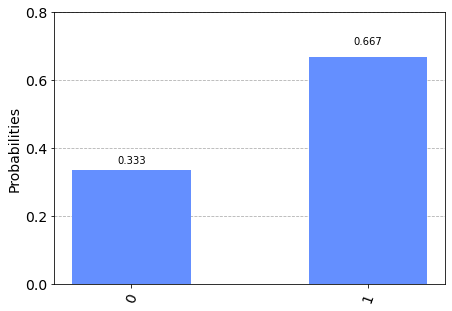

In [9]:
plot_histogram(counts1)

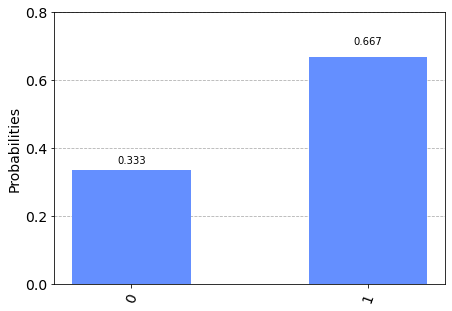

In [10]:
plot_histogram(counts1)

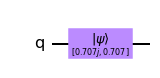

In [11]:
qc = QuantumCircuit(1)
initial_state = [1j / sqrt(2), 1/sqrt(2)]
qc.initialize(initial_state, 0)
qc.draw(output='mpl')

The qubit is now in state:

<img src="./resources/i10_qubit_state.png" width="20%"/>


In [12]:
# Verifying the state's wave function:
qc.save_statevector()
qc = transpile(qc, sim)
result = sim.run(qc).result()
state = result.get_statevector()
print("Qubit State: ", state)

Qubit State:  [0.        +0.70710678j 0.70710678+0.j        ]


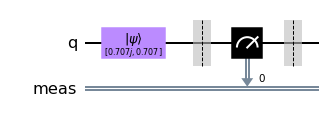

In [13]:
# Recreating the circuit and measuring it
qc = QuantumCircuit(1)
initial_state = [1j / sqrt(2), 1/sqrt(2)]
qc.initialize(initial_state, 0)

qc.measure_all()
qc.save_statevector()
qc.draw(output='mpl')

In [14]:
# The qubit's state after measurement (we will get either 0 or 1 on the classical register)
qc = transpile(qc, sim)
result = sim.run(qc).result()
state = result.get_statevector()
print("Qubit State: ", state)

Qubit State:  [0.+0.j 1.+0.j]


Note how the global phase remains intact! This means that when we measure along $\{|0>, |1>\}$ we do not necessarily get exactly $|0>$ or $|1>$. However, this is not quite useful, since it cannot be measured on a real quantum computer (the output that gets registered after measurement is either 0 or 1).  

Also, since these are simulators, we can take a peek at the qubits' states at any point in time (with .save_statevector() and .get_statevector()). This is not possible on a real quantum computer.

---
### The Bloch Sphere

<img src="./resources/i11_bloch_sphere_equation.png" width="50%"/>





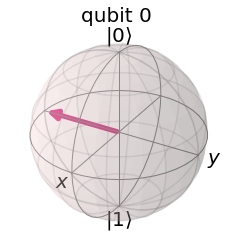

In [15]:
qc = QuantumCircuit(1)

initial_state = [1j / sqrt(2), 1/sqrt(2)]
qc.initialize(initial_state, 0)

statevector_simulator = Aer.get_backend('statevector_simulator')

result = execute(qc, statevector_simulator).result()

statevector_results = result.get_statevector(qc)
plot_bloch_multivector(statevector_results)

In [16]:
"""
Exercise: Plot
|1>
1/root(2) (|0> + |1>)        [|+>  state]
1/root(2) (|0> - i|1>)       [|-i> state]
"""
import numpy as np
def plotFunc(initial_state):
    qc = QuantumCircuit(1)
    qc.initialize(initial_state, 0)

    statevector_simulator = Aer.get_backend('statevector_simulator')

    result = execute(qc, statevector_simulator).result()

    statevector_results = result.get_statevector(qc)
    return statevector_results

ket_zero = np.array([1,0])
ket_one = np.array([0,1])
    
print("Process Complete!")

Process Complete!


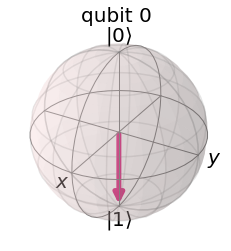

In [17]:
statevector_results = plotFunc(ket_one)
plot_bloch_multivector(statevector_results)

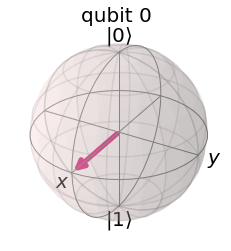

In [18]:
# |+> state
state = 1/sqrt(2) * (ket_zero + ket_one)
statevector_results = plotFunc(state)
plot_bloch_multivector(statevector_results)

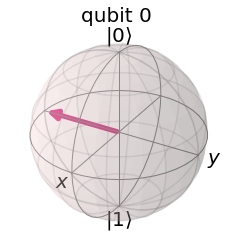

In [19]:
# |-i> state (along the -y axis)
state = 1/sqrt(2) * (ket_zero - 1j * ket_one)
statevector_results = plotFunc(state)
plot_bloch_multivector(statevector_results)

In [20]:
import qiskit.tools.jupyter
%qiskit_version_table

C:\Users\aryam\anaconda3\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
